<a href="https://colab.research.google.com/github/Mukhopadhyay/MNIST_Classifier-using-TF-and-Keras/blob/master/MNIST_Classifier_TF_and_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment)** Write an **MNIST classifier** that trains to **99%** accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

In [54]:
import tensorflow as tf
print(tf.__version__)

1.15.0


Adding the class within which we are defining the callback function

In [0]:
class myCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('acc') > 0.99):
      print('\nAccuracy of the network is now 99% so stopping the training')
      #Stop the training if the condition is satisfied
      self.model.stop_training = True

In [0]:
mnist = tf.keras.datasets.mnist
(training_data, training_label), (test_data, test_label) = mnist.load_data()

**Importing pyplot to visualize the data**

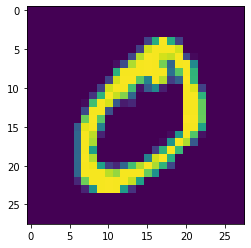

In [72]:
import matplotlib.pyplot as plt
plt.imshow(training_data[1])
#print(training_data[1])

**Normalizing the data**

In [0]:
training_data = training_data / 255.0
test_data = test_data / 255.0
#print(training_data[0])

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [0]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [78]:
callbacks = myCallbacks()
model.fit(training_data, training_label, epochs = 10, callbacks = [callbacks])
#print(history.epoch)
#print(history['acc'][-1])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2615 - acc: 0.9238
Epoch 2/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1146 - acc: 0.9667
Epoch 3/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0769 - acc: 0.9765
Epoch 4/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0573 - acc: 0.9825
Epoch 5/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0451 - acc: 0.9855
Epoch 6/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0349 - acc: 0.9893
Epoch 7/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0285 - acc: 0.9908
